In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


In [2]:
dataset = pd.read_csv("/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv", delimiter='\t')
dataset

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# EDA

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# 긍/부정 별 갯수 
dataset.groupby('feedback').count()
# 부정에 비해 긍정이 많다 

,rating,date,variation,verified_reviews
feedback,,,,
0,257,257,257,257
1,2893,2893,2893,2893


In [6]:
# 레이팅별 갯수 
dataset.groupby('rating').count()

,date,variation,verified_reviews,feedback
rating,,,,
1,161,161,161,161
2,96,96,96,96
3,152,152,152,152
4,455,455,455,455
5,2286,2286,2286,2286


In [7]:
# 긍/부정에 따른 별점 평균 
print(dataset.query(f'feedback==1')['rating'].mean())
print(dataset.query(f'feedback==0')['rating'].mean())

4.737642585551331
1.3735408560311284


In [8]:
# 긍정 평가를 준 사람의 최솟값 : 3
## 3~ 5 > 긍정 점수 
print(dataset.query(f'feedback==1')['rating'].min())

3


In [9]:
# 부정 평가를 준 사람의 최댓값 : 5
## 1~3 > 부정점수
print(dataset.query(f'feedback==0')['rating'].max())

2


# 2. feedback 긍정리뷰(1), 부정리뷰(0) 그래프로 파악해보기

<AxesSubplot:xlabel='feedback', ylabel='count'>

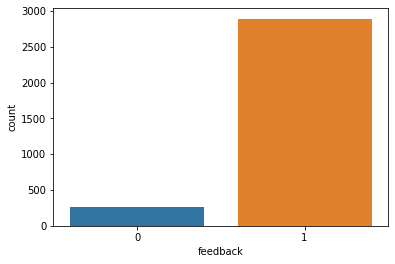

In [10]:
# 막대 그래프로 나타내보자 

import seaborn as sns 
sns.countplot(x='feedback', data=dataset)

# 3. rating 유저의 별점 별 리뷰 그래프로 파악해보기

<AxesSubplot:xlabel='rating', ylabel='count'>

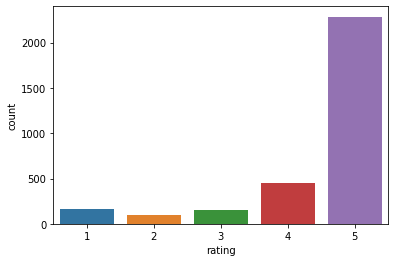

In [11]:
sns.countplot(x='rating', data=dataset)

# 3-1 긍/부정별 레이팅은 어떻게될까 ? 

<AxesSubplot:xlabel='feedback', ylabel='rating'>

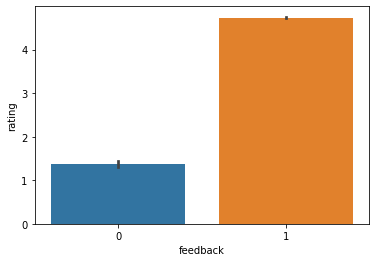

In [12]:
import seaborn as sns 
sns.barplot(x='feedback', y= 'rating', data=dataset)

# 4. wordcloud를 이용하여 유저들이 어떤 단어를 많이 사용했는지 시각화해보기

In [13]:
from wordcloud import WordCloud, STOPWORDS 
import numpy as np 


In [14]:
# 워드크라우드 라이브러리 안에 내장되어있는 기본 불용어들 
print(STOPWORDS)
stopwords = set(STOPWORDS)
# 불용어를 추가하고 싶다면 
# stopwords.add(" ~~")


{'get', 'your', "i'll", 'should', 'her', 'our', "shouldn't", 'yourself', "you're", 'therefore', 'with', 'been', 'she', 'by', 'their', 'those', 'am', 'again', 'through', 'over', 'here', 'then', "we'd", "wouldn't", "how's", "aren't", 'nor', 'while', "you'd", 'about', "he'll", "she'll", 'doing', "it's", "they've", 'any', "you'll", "why's", 'how', 'few', 'r', "we're", 'more', 'at', "mustn't", 'http', 'during', 'own', 'was', 'under', 'me', 'no', "i'm", 'ours', 'are', 'can', 'them', "she's", 'further', "she'd", 'up', "we'll", 'for', "i'd", 'a', 'an', "i've", 'the', "they're", 'you', 'yourselves', 'ought', 'myself', 'there', 'as', "he's", 'ever', "weren't", 'com', 'were', 'himself', "here's", 'not', 'it', 'which', 'below', 'into', 'itself', 'between', "hadn't", 'he', 'same', 'above', "wasn't", "what's", "isn't", "can't", 'themselves', 'however', 'is', 'but', "they'd", 'or', "you've", 'of', 'what', 'that', 'down', "where's", 'has', 'would', "couldn't", 'k', "that's", 'where', "let's", 'some', 

In [15]:
#워드크라우드에 사용하기 위해 data frame 모든 텍스트들을 하나로 합친다 .
text = ''.join(dataset['verified_reviews'])
print(text)

Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I've purchased. I'm working on getting on

In [16]:
wc = WordCloud(background_color ='white', max_words = 2000,stopwords=stopwords)
wc = wc.generate(text)
wc.words_ #최빈단어

{'love': 1.0,
 'Alexa': 0.5986471251409244,
 'use': 0.5276211950394588,
 'great': 0.43968432919954903,
 'music': 0.42164599774520856,
 'Echo': 0.4036076662908681,
 'work': 0.36076662908680945,
 'one': 0.342728297632469,
 'device': 0.3269447576099211,
 'set': 0.322435174746336,
 'easy': 0.3043968432919955,
 'thing': 0.2829763246899662,
 'sound': 0.2705749718151071,
 'time': 0.26719278466741825,
 'good': 0.2593010146561443,
 'speaker': 0.25140924464487036,
 'product': 0.2266065388951522,
 'will': 0.21758737316798196,
 'echo dot': 0.20856820744081173,
 'Amazon': 0.20631341600901917,
 'new': 0.20518602029312288,
 'really': 0.19052987598647125,
 'now': 0.18376550169109357,
 'play': 0.18151071025930102,
 's': 0.17812852311161217,
 'dot': 0.17812852311161217,
 'bought': 0.17474633596392333,
 'need': 0.1657271702367531,
 'light': 0.1657271702367531,
 'fun': 0.16459977452085683,
 'far': 0.161217587373168,
 'home': 0.14430665163472378,
 'much': 0.14430665163472378,
 'show': 0.13979706877113868,


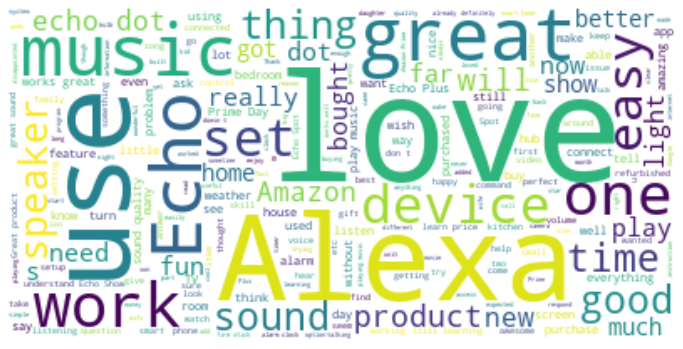

In [17]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5. 불용어(stopwords) ex) Alexa, one, will 등 삭제하기

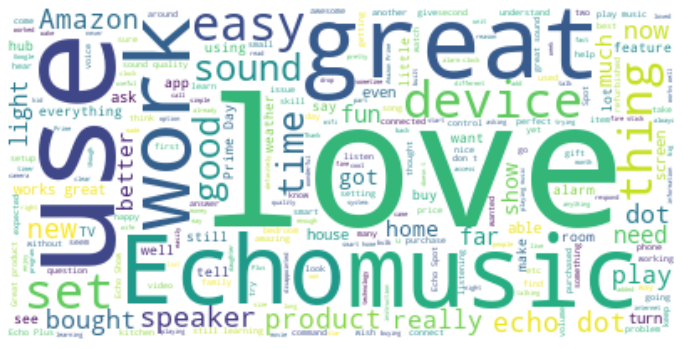

In [18]:
stopwords2=stopwords 

# 제거
del_list = ['Alexa','one','will','s','m']

for i in del_list:
    stopwords2.add(i)

wc = WordCloud(background_color ='white', max_words = 2000,stopwords=stopwords2)
wc = wc.generate(text)

# 시각화
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# (Plus) 리뷰(verified_reviews)를 통해 다양한 시각화, 데이터 인사이트 뽑아내보기 ex) 리뷰와 별점간의 관계, 리뷰와 피드백간의 관계, 리뷰 속 단어들의 관계 등